In [1]:
from dask.distributed import Client

client = Client(n_workers=4)

In [2]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: total: 156 ms
Wall time: 3.11 s


In [4]:
from dask import delayed

In [5]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: total: 0 ns
Wall time: 0 ns


In [7]:
%%time
z.compute()

CPU times: total: 93.8 ms
Wall time: 2.1 s


5

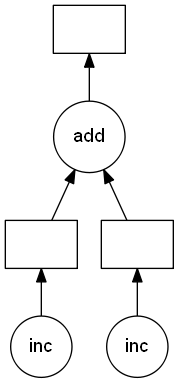

In [8]:
z.visualize()

In [9]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [10]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: total: 391 ms
Wall time: 8.11 s


In [11]:
total

44

In [13]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-5bd001bf-5af0-4f9e-a6e3-4ea207a162e3')
After computing : 44
CPU times: total: 125 ms
Wall time: 2.05 s
